In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from itertools import combinations

## Základný opis dát spolu s ich charakteristikami


#### (A)

In [3]:
def get_dataset_info(dataset):
    print('Počet záznamov:', dataset.shape[0])
    print('Počet atribútov:', dataset.shape[1])
    print('Názvy atribútov:', [*dataset.columns])

    get_attribute_types(dataset)

def get_attribute_types(dataset):
    print('\nDátové typy jednotlivých atribútov:')
    print(dataset.dtypes)

##### Dataset 1: connections.csv

In [4]:
connections = pd.read_csv('data/connections.csv', sep='\t')
connections.head()

,ts,imei,mwra,c.android.gm,c.android.youtube,c.katana,c.dogalize,c.android.chrome,c.android.vending,c.raider,c.UCMobile.intl,c.updateassist,c.UCMobile.x86
0,2018-05-05 10:00:00,3590433799317661073,1.0,10.73779,7.60358,10.30550,12.72137,17.14262,63.02014,52.99201,79.18648,71.70308,82.68561
1,2018-05-05 10:01:00,3590433799317661784,1.0,13.88095,10.68630,8.36266,13.90403,13.28416,54.83081,41.20946,89.97421,25.11522,60.15617
2,2018-05-05 10:02:00,863033069630348917,0.0,9.38536,16.17278,13.29120,5.79980,15.01395,49.94955,55.12888,35.60304,32.90686,28.07780
3,2018-05-05 10:03:00,863033069630348339,1.0,7.29835,16.20768,9.73707,13.21535,9.59391,48.30890,65.90586,70.97902,79.61014,7.25507
4,2018-05-05 10:04:00,3590433799317662212,0.0,12.68999,12.72589,6.94943,9.72027,16.11904,54.58740,50.94873,98.93871,91.55704,12.11459


In [5]:
get_dataset_info(connections)

Počet záznamov: 15160
Počet atribútov: 13
Názvy atribútov: ['ts', 'imei', 'mwra', 'c.android.gm', 'c.android.youtube', 'c.katana', 'c.dogalize', 'c.android.chrome', 'c.android.vending', 'c.raider', 'c.UCMobile.intl', 'c.updateassist', 'c.UCMobile.x86']

Dátové typy jednotlivých atribútov:
ts                    object
imei                   int64
mwra                 float64
c.android.gm         float64
c.android.youtube    float64
c.katana             float64
c.dogalize           float64
c.android.chrome     float64
c.android.vending    float64
c.raider             float64
c.UCMobile.intl      float64
c.updateassist       float64
c.UCMobile.x86       float64
dtype: object


##### Dataset 2: devices.csv

In [6]:
devices = pd.read_csv('data/devices.csv', sep='\t')
devices.head()

,latitude,longitude,store_name,code,location,imei
0,15.58552,102.42587,Bua Yai,TH,Asia/Bangkok,3590433799317661925
1,52.59319,13.32127,Wittenau,DE,Europe/Berlin,8630330696303482139
2,35.88264,-80.08199,Thomasville,US,America/New_York,863033069630348537
3,42.28639,18.84000,Budva,ME,Europe/Podgorica,863033069630348438
4,46.51872,86.00214,Hoxtolgay,CN,Asia/Urumqi,3590433799317661529


In [7]:
get_dataset_info(devices)

Počet záznamov: 2980
Počet atribútov: 6
Názvy atribútov: ['latitude', 'longitude', 'store_name', 'code', 'location', 'imei']

Dátové typy jednotlivých atribútov:
latitude      float64
longitude     float64
store_name     object
code           object
location       object
imei            int64
dtype: object


##### Dataset 3: processes.csv

In [8]:
processes = pd.read_csv('data/processes.csv', sep='\t')
processes.head()

,ts,imei,mwra,p.android.chrome,p.system,p.android.externalstorage,p.android.packageinstaller,p.android.documentsui,p.android.gm,p.android.settings,...,p.dogalize,p.android.defcontainer,p.google,p.android.gms,p.olauncher,p.android.vending,p.browser.provider,p.process.gapps,p.gms.persistent,p.simulator
0,2018-05-05 10:00:00,3590433799317661073,1.0,13.85861,7.64793,7.27894,9.57361,8.33502,9.63344,14.10782,...,49.63998,52.22598,86.79731,88.93302,12.84506,2.63115,90.52801,90.51873,35.23943,93.56427
1,2018-05-05 10:01:00,3590433799317661784,1.0,15.41892,14.08046,6.67208,9.29380,9.44110,7.40963,14.00144,...,50.35593,45.19193,87.84568,25.99896,90.22100,71.68478,89.94562,71.77292,64.49298,42.81274
2,2018-05-05 10:02:00,863033069630348917,0.0,9.02474,10.64196,12.71551,14.92095,10.43897,10.23411,12.33791,...,51.05029,29.87061,59.48429,45.04187,1.58945,13.22444,88.76900,64.93572,45.52142,44.37595
3,2018-05-05 10:03:00,863033069630348339,1.0,7.73562,16.25267,8.75428,10.09556,10.68004,7.78818,11.13198,...,61.63920,86.63658,18.00165,20.65816,22.51564,28.59876,62.69179,34.25119,4.52876,72.11141
4,2018-05-05 10:04:00,3590433799317662212,0.0,7.46264,12.82177,10.80300,4.85724,12.01441,9.38242,17.40947,...,36.14104,41.29170,72.44112,93.65874,50.08215,38.17231,6.71236,72.23466,68.04155,33.38015


In [9]:
get_dataset_info(processes)

Počet záznamov: 15160
Počet atribútov: 23
Názvy atribútov: ['ts', 'imei', 'mwra', 'p.android.chrome', 'p.system', 'p.android.externalstorage', 'p.android.packageinstaller', 'p.android.documentsui', 'p.android.gm', 'p.android.settings', 'p.inputmethod.latin', 'p.notifier', 'p.katana', 'p.dogalize', 'p.android.defcontainer', 'p.google', 'p.android.gms', 'p.olauncher', 'p.android.vending', 'p.browser.provider', 'p.process.gapps', 'p.gms.persistent', 'p.simulator']

Dátové typy jednotlivých atribútov:
ts                             object
imei                            int64
mwra                          float64
p.android.chrome              float64
p.system                      float64
p.android.externalstorage     float64
p.android.packageinstaller    float64
p.android.documentsui         float64
p.android.gm                  float64
p.android.settings            float64
p.inputmethod.latin           float64
p.notifier                    float64
p.katana                      float64
p.d

##### Dataset 4: profiles.csv

In [10]:
profiles = pd.read_csv('data/profiles.csv', sep='\t')
profiles.head()

,residence,username,birthdate,imei,name,ssn,registration,address,company,user_id,mail,current_location
0,NaN,benjaminlinda,NaN,359043379931766536,Barry Clay,380-33-1115,2022/11/01,"836 Johnson Throughway\nPort Ritaborough, AR 3...",Montgomery Group,322,jamesrichard@hotmail.com,"(Decimal('29.2545215'), Decimal('56.881839'))"
1,NaN,emilyanderson,NaN,3590433799317662154,Justin Clark,244-95-2123,2023/11/28,"84743 Anna Vista\nEast Jaredborough, MT 07310",Williams-Smith,1634,steve96@hotmail.com,"(Decimal('-73.8245355'), Decimal('-147.436751'))"
2,NaN,vfriedman,NaN,3590433799317662162,Kimberly Atkinson,052-18-1099,11 Apr 2020,USNV Carrillo\nFPO AA 27278,"Khan, Dodson and Frank",1538,robert85@yahoo.com,"(Decimal('10.6039875'), Decimal('-82.963400'))"
3,NaN,utaylor,1985-11-17,3590433799317661347,David Robinson,035-28-4630,01 Aug 2019,"297 Berry Creek Suite 292\nChristophershire, M...",Klein-Lopez,1661,emmamatthews@gmail.com,"(Decimal('-71.951311'), Decimal('-90.881496'))"
4,NaN,xpierce,2018-11-04,359043379931766064,Victoria Nguyen,754-23-6927,"03/02/2022, 00:00:00","164 Osborne Oval Suite 980\nAshleyville, CO 24401",Tran LLC,1676,ginamartin@yahoo.com,"(Decimal('0.3168465'), Decimal('-24.514492'))"


In [11]:
get_dataset_info(profiles)

Počet záznamov: 2520
Počet atribútov: 12
Názvy atribútov: ['residence', 'username', 'birthdate', 'imei', 'name', 'ssn', 'registration', 'address', 'company', 'user_id', 'mail', 'current_location']

Dátové typy jednotlivých atribútov:
residence           object
username            object
birthdate           object
imei                 int64
name                object
ssn                 object
registration        object
address             object
company             object
user_id              int64
mail                object
current_location    object
dtype: object


### Vzťahy medzi datasetmi

In [12]:
dataframes = enumerate([connections, devices, processes, profiles])
names = ['connections', 'devices', 'processes', 'profiles']

print('Počet súborov:', len(names))
print('Súbory:', ', '.join([name + '.csv' for name in names]))

print('\nZdieľané atribúty:')
for df_a, df_b in combinations(dataframes, 2):
    shared_columns = set(df_a[1].columns).intersection(df_b[1].columns)
    
    print(f'{names[df_a[0]]}, {names[df_b[0]]}: {list(shared_columns)}')

Počet súborov: 4
Súbory: connections.csv, devices.csv, processes.csv, profiles.csv

Zdieľané atribúty:
connections, devices: ['imei']
connections, processes: ['mwra', 'ts', 'imei']
connections, profiles: ['imei']
devices, processes: ['imei']
devices, profiles: ['imei']
processes, profiles: ['imei']


Všetky datasety zdieľajú atribút **imei**.

Datasety _connections_ a _processes_ zdieľajú aj atribúty **mwra** a **ts**.

**imei**: jedinečný identifikátor

**mwra** a **ts**: tieto atribúty nemusia byť vzájomne prepojené medzi jednotlivými datasetmi.

#### (B)

##### Zvolené dôležité atribúty
- **connections**: 'c.android.gm', 'c.android.youtube', 'c.katana', 'c.updateassist'
- **processes**: 'p.android.chrome', 'p.google' 'p.system', 'p.android.packageinstaller', 'p.android.documentsui', 'p.dogalize'

Súbory **devices** a **profiles** by nemali mať na vývoj _mwra_ výrazný vplyv.

In [13]:
def get_description(dataset, attribute):
    df = dataset[attribute]
    print(df.describe())
    
    get_unique_values(df)
    get_distribution(df)

def get_unique_values(df):
    unique = df.unique()
    print('\nPočet unikátnych hodnôt:', len(unique))
    print('Unikátne hodnoty:', unique)

def get_distribution(df):
    shapiro = stats.shapiro(df)
    variance = np.var(df)
    
    print('\nShapiro Test:', shapiro.pvalue)
    
    if shapiro.pvalue > 0.05:
        print('Dáta sú normálne distribuované.')
    else:
        print('Dáta nie sú normálne distribuované')
    
    print('Variácia', variance)
    sns.histplot(df)

c.android.gm

count    15160.000000
mean        11.027970
std          2.560378
min          0.000000
25%          9.144557
50%         11.154775
75%         12.945265
max         19.297030
Name: c.android.gm, dtype: float64

Počet unikátnych hodnôt: 14863
Unikátne hodnoty: [10.73779 13.88095  9.38536 ...  8.82572 12.34809 11.37445]

Shapiro Test: 3.350271134430807e-23
Dáta nie sú normálne distribuované
Variácia 6.555102801052142


c:\Users\User\Desktop\STU\2_ZS\IAU\iau\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15160.
  res = hypotest_fun_out(*samples, **kwds)


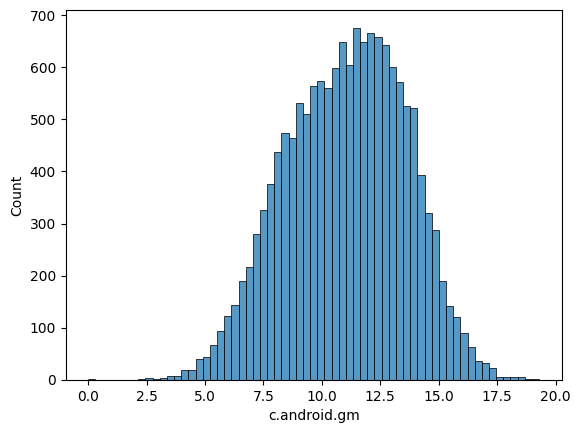

In [14]:
get_description(connections, 'c.android.gm')

c.android.youtube

count    15160.000000
mean        11.659965
std          2.427547
min          3.559390
25%          9.827303
50%         11.720195
75%         13.404993
max         20.936200
Name: c.android.youtube, dtype: float64

Počet unikátnych hodnôt: 14855
Unikátne hodnoty: [ 7.60358 10.6863  16.17278 ...  9.88394  7.72316 12.91379]

Shapiro Test: 2.1173132624811007e-21
Dáta nie sú normálne distribuované
Variácia 5.892596601301847


c:\Users\User\Desktop\STU\2_ZS\IAU\iau\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15160.
  res = hypotest_fun_out(*samples, **kwds)


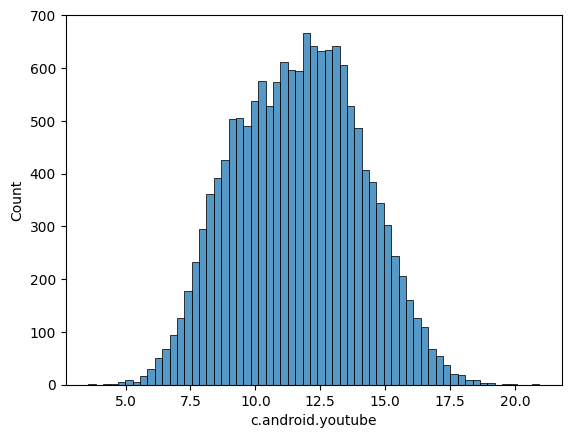

In [15]:
get_description(connections, 'c.android.youtube')

c.katana

c:\Users\User\Desktop\STU\2_ZS\IAU\iau\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15160.
  res = hypotest_fun_out(*samples, **kwds)


count    15160.000000
mean        10.478311
std          2.611144
min          0.521960
25%          8.607812
50%         10.354100
75%         12.307950
max         21.120630
Name: c.katana, dtype: float64

Počet unikátnych hodnôt: 14859
Unikátne hodnoty: [10.3055   8.36266 13.2912  ... 11.90293  9.35521  8.94454]

Shapiro Test: 3.495135845260726e-18
Dáta nie sú normálne distribuované
Variácia 6.817624639869279


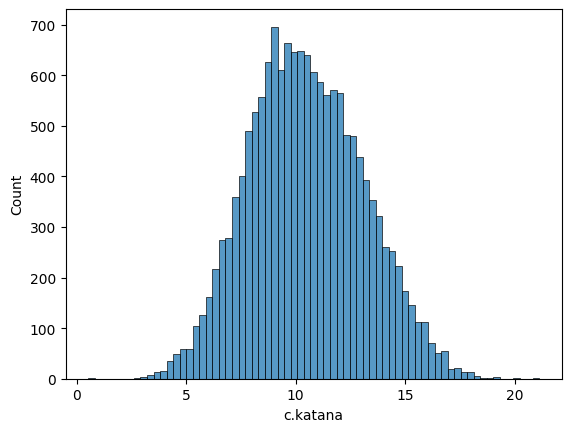

In [16]:
get_description(connections, 'c.katana')

c.updateassist

count    15160.000000
mean        50.018180
std         28.948564
min          0.000000
25%         24.898347
50%         50.318470
75%         74.943438
max        100.000000
Name: c.updateassist, dtype: float64

Počet unikátnych hodnôt: 14965
Unikátne hodnoty: [71.70308 25.11522 32.90686 ... 83.6321  20.37678 45.43466]


c:\Users\User\Desktop\STU\2_ZS\IAU\iau\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15160.
  res = hypotest_fun_out(*samples, **kwds)



Shapiro Test: 1.7117011457527663e-55
Dáta nie sú normálne distribuované
Variácia 837.96408605087


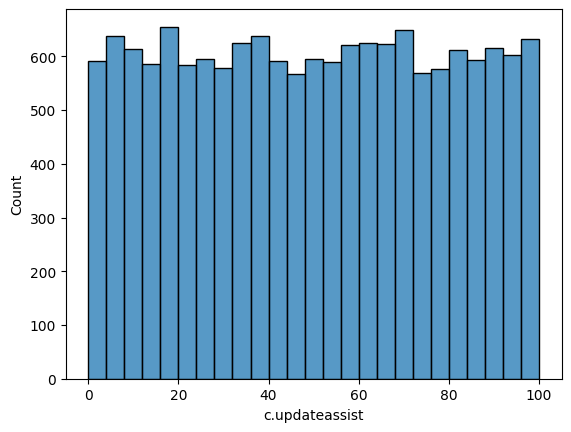

In [17]:
get_description(connections, 'c.updateassist')

p.android.chrome

count    15160.000000
mean        10.386023
std          2.590363
min          2.171830
25%          8.548547
50%         10.073305
75%         12.011582
max         21.849440
Name: p.android.chrome, dtype: float64

Počet unikátnych hodnôt: 14847
Unikátne hodnoty: [13.85861 15.41892  9.02474 ...  9.91237 15.80183  6.2933 ]

Shapiro Test: 2.3893438425360207e-36
Dáta nie sú normálne distribuované
Variácia 6.709535932983072


c:\Users\User\Desktop\STU\2_ZS\IAU\iau\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15160.
  res = hypotest_fun_out(*samples, **kwds)


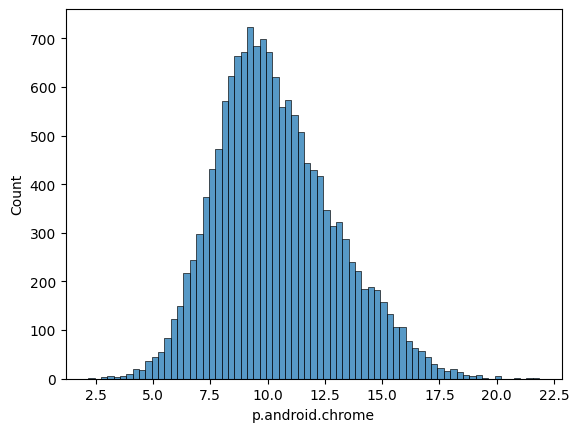

In [18]:
get_description(processes, 'p.android.chrome')

p.google

count    15160.000000
mean        49.659617
std         28.970207
min          0.000000
25%         24.701352
50%         49.239315
75%         74.843225
max        100.000000
Name: p.google, dtype: float64

Počet unikátnych hodnôt: 14976
Unikátne hodnoty: [86.79731 87.84568 59.48429 ...  5.36384  6.20594  6.66866]

Shapiro Test: 8.881112462814573e-56
Dáta nie sú normálne distribuované
Variácia 839.2175445251015


c:\Users\User\Desktop\STU\2_ZS\IAU\iau\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15160.
  res = hypotest_fun_out(*samples, **kwds)


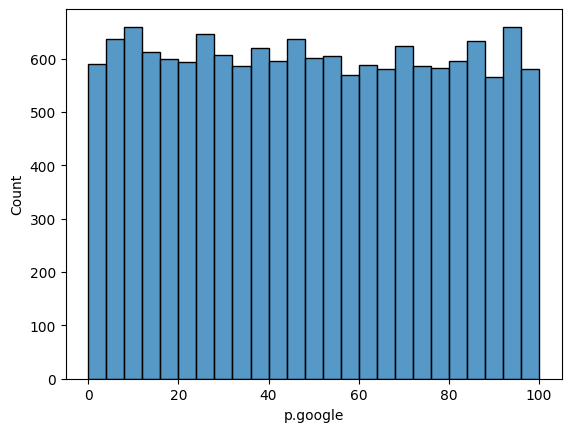

In [19]:
get_description(processes, 'p.google')

p.system

count    15160.000000
mean        11.021445
std          2.792024
min          0.391320
25%          9.015808
50%         11.019560
75%         13.015192
max         21.750310
Name: p.system, dtype: float64

Počet unikátnych hodnôt: 14872
Unikátne hodnoty: [ 7.64793 14.08046 10.64196 ... 10.64953  9.4625   9.95725]

Shapiro Test: 4.649780025882763e-10
Dáta nie sú normálne distribuované
Variácia 7.794882105159191


c:\Users\User\Desktop\STU\2_ZS\IAU\iau\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15160.
  res = hypotest_fun_out(*samples, **kwds)


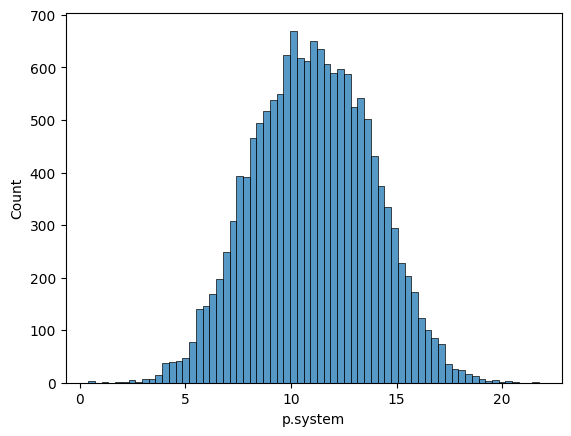

In [20]:
get_description(processes, 'p.system')

p.android.packageinstaller

count    15160.000000
mean        10.479725
std          2.576213
min          1.563850
25%          8.590737
50%         10.461030
75%         12.429803
max         19.729040
Name: p.android.packageinstaller, dtype: float64

Počet unikátnych hodnôt: 14855
Unikátne hodnoty: [ 9.57361  9.2938  14.92095 ...  9.67654 10.61643 11.0495 ]

Shapiro Test: 2.6543695689337345e-18
Dáta nie sú normálne distribuované
Variácia 6.636433783371936


c:\Users\User\Desktop\STU\2_ZS\IAU\iau\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15160.
  res = hypotest_fun_out(*samples, **kwds)


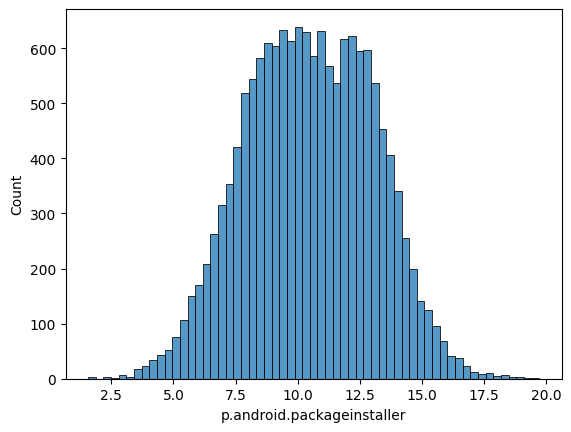

In [21]:
get_description(processes, 'p.android.packageinstaller')

p.android.documentsui

count    15160.000000
mean        10.368350
std          2.403547
min          3.126100
25%          8.656420
50%         10.071015
75%         11.959665
max         19.542390
Name: p.android.documentsui, dtype: float64

Počet unikátnych hodnôt: 14845
Unikátne hodnoty: [ 8.33502  9.4411  10.43897 ... 11.74081  6.74787 14.64721]

Shapiro Test: 1.2105017290812943e-34
Dáta nie sú normálne distribuované
Variácia 5.776655537056104


c:\Users\User\Desktop\STU\2_ZS\IAU\iau\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15160.
  res = hypotest_fun_out(*samples, **kwds)


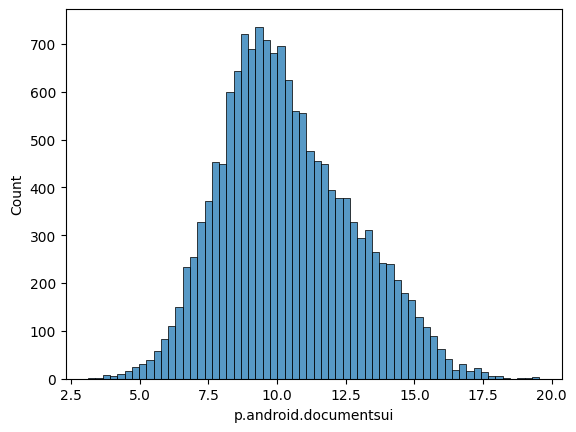

In [22]:
get_description(processes, 'p.android.documentsui')

p.dogalize

count    15160.000000
mean        50.690624
std         12.553021
min          0.000000
25%         42.275680
50%         50.762725
75%         59.090483
max        100.000000
Name: p.dogalize, dtype: float64

Počet unikátnych hodnôt: 14958
Unikátne hodnoty: [49.63998 50.35593 51.05029 ... 44.62307 37.32353 42.45378]

Shapiro Test: 0.6961141513294777
Dáta sú normálne distribuované.
Variácia 157.56794268369748


c:\Users\User\Desktop\STU\2_ZS\IAU\iau\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15160.
  res = hypotest_fun_out(*samples, **kwds)


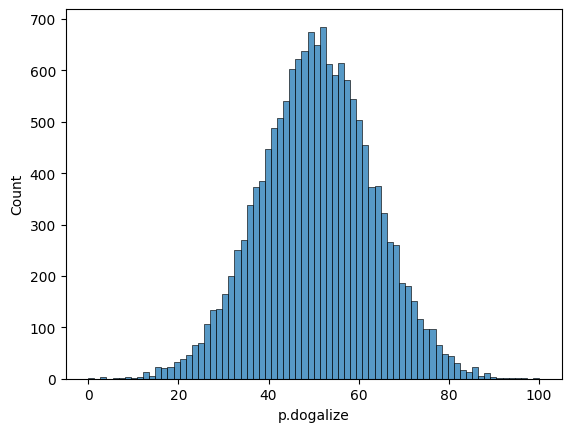

In [23]:
get_description(processes, 'p.dogalize')

#### (C)

#### Párová analýza dát
Párovú analýzu dát pre numerické hodnoty uskutočníme pomocou _korelačnej tabuľky_, ktorá ukáže potenciálne súvisloti medzi atribútmi.
Súbory, ktoré obsahujú prevažne numerické údaje: **connections**, **processes**

Párovú analýzu dát pre kategorické hodnoty spravíme pre atribút **location** (konkrétne kontinent) v súbore **devices** a pozitívnu hodnotu mwra (1) v súbore **connections**.

<Axes: >

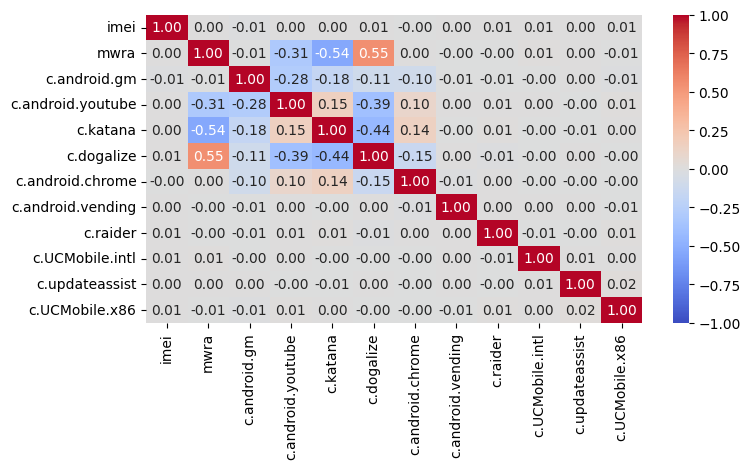

In [24]:
connections_corr = connections.corr(numeric_only=True)

plt.figure(figsize=(8, 4))
sns.heatmap(connections_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

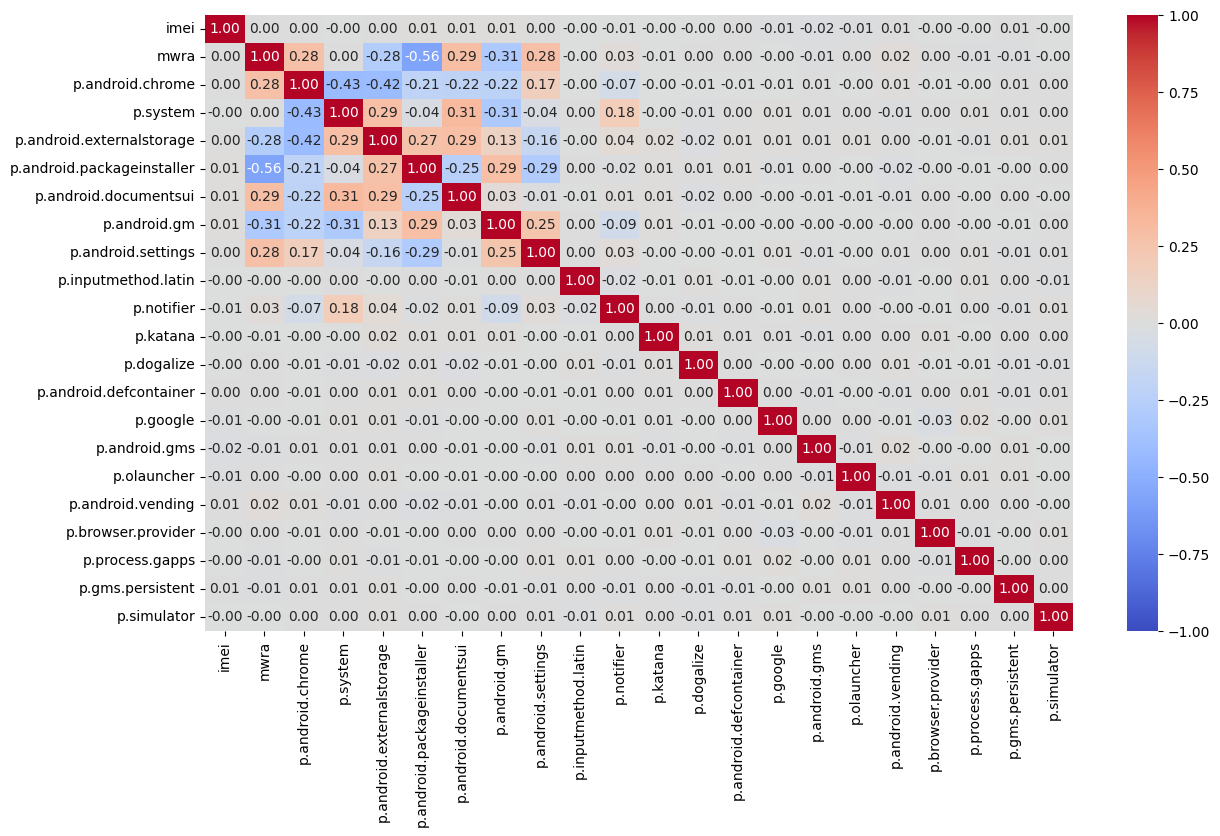

In [25]:
processes_corr = processes.corr(numeric_only=True)

plt.figure(figsize=(14, 8))
sns.heatmap(processes_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

Celkové rozdelenie záznamov podľa kontinentu:
   continent  records
0     Africa     7773
1    America    26572
2       Asia    25566
3   Atlantic      179
4  Australia     1032
5     Europe    28597
6     Indian      529
7    Pacific      527


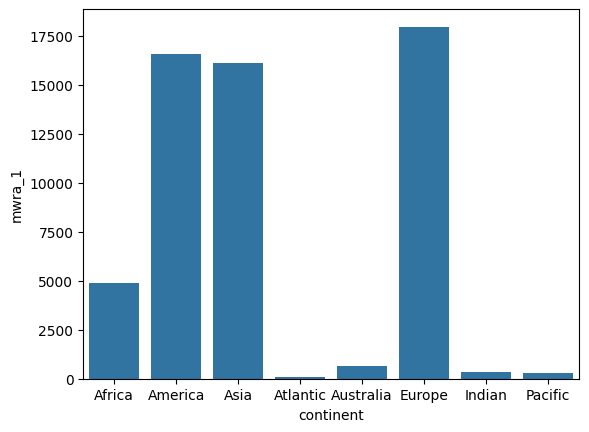

In [30]:
connection_devices = pd.merge(connections, devices, on='imei', how='inner')

connection_devices_split = connection_devices['location'].str.split('/', expand=True)
connection_devices_split.columns = ['continent', 'country', 'city']

connection_devices = pd.concat([connection_devices, connection_devices_split], axis=1)
connection_devices_grouped = connection_devices[connection_devices['mwra'] == 1].groupby('continent').size().reset_index(name='mwra_1')

continent_records = connection_devices.groupby('continent').size().reset_index(name='records')

sns.barplot(data=connection_devices_grouped, x='continent', y='mwra_1')
print('Celkové rozdelenie záznamov podľa kontinentu:')
print(continent_records)

#### (D)

In [36]:
print('Korelácie s atribútom mwra v datasete connections:')
pd.DataFrame(connections_corr['mwra'].drop('mwra'))

Korelácie s atribútom mwra v datasete connections:


,mwra
imei,0.001797
c.android.gm,-0.005328
c.android.youtube,-0.308474
c.katana,-0.543591
c.dogalize,0.547656
c.android.chrome,0.004045
c.android.vending,-0.003360
c.raider,-0.003713
c.UCMobile.intl,0.007997
c.updateassist,0.000169


<Axes: xlabel='mwra', ylabel='c.katana'>

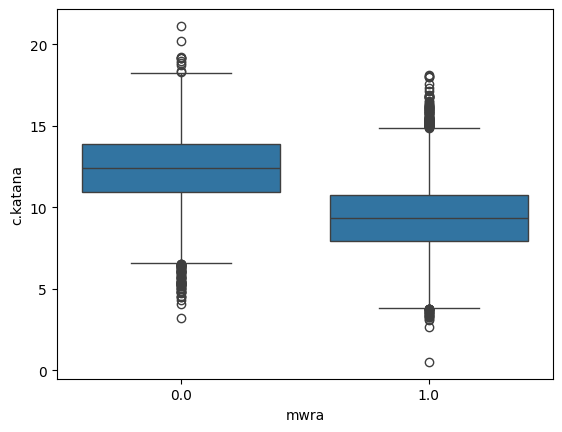

In [32]:
sns.boxplot(x='mwra', y='c.katana', data=connections)

<Axes: xlabel='mwra', ylabel='c.dogalize'>

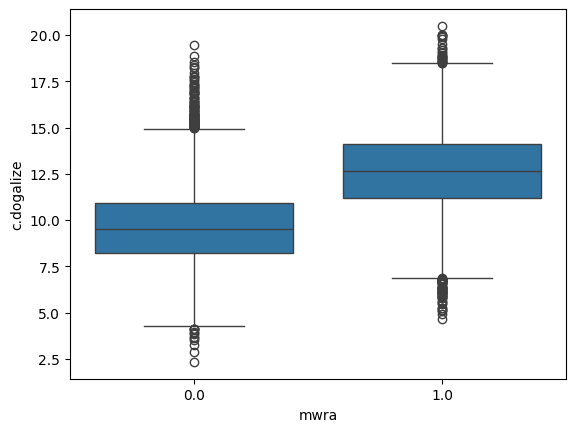

In [33]:
sns.boxplot(x='mwra', y='c.dogalize', data=connections)

<Axes: xlabel='mwra', ylabel='c.android.youtube'>

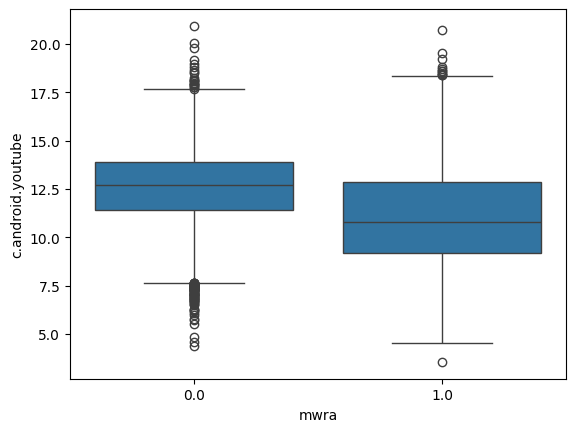

In [40]:
sns.boxplot(x='mwra', y='c.android.youtube', data=connections)

In [37]:
print('Korelácie s atribútom mwra v datasete processes:')
pd.DataFrame(processes_corr['mwra'].drop('mwra'))

Korelácie s atribútom mwra v datasete processes:


,mwra
imei,0.001797
p.android.chrome,0.281226
p.system,0.001653
p.android.externalstorage,-0.280496
p.android.packageinstaller,-0.564430
p.android.documentsui,0.294514
p.android.gm,-0.314852
p.android.settings,0.275792
p.inputmethod.latin,-0.003753
p.notifier,0.026986


<Axes: xlabel='mwra', ylabel='p.android.packageinstaller'>

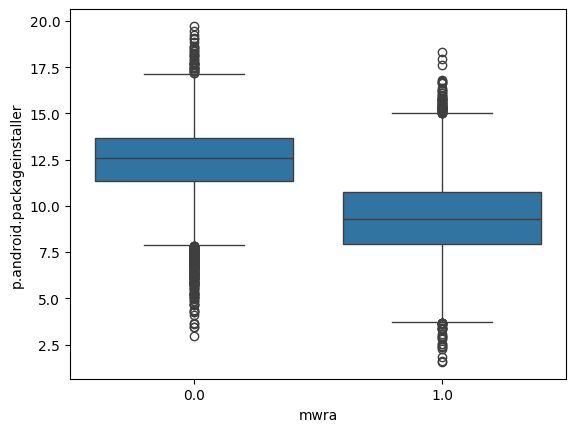

In [38]:
sns.boxplot(x='mwra', y='p.android.packageinstaller', data=processes)

<Axes: xlabel='mwra', ylabel='p.android.documentsui'>

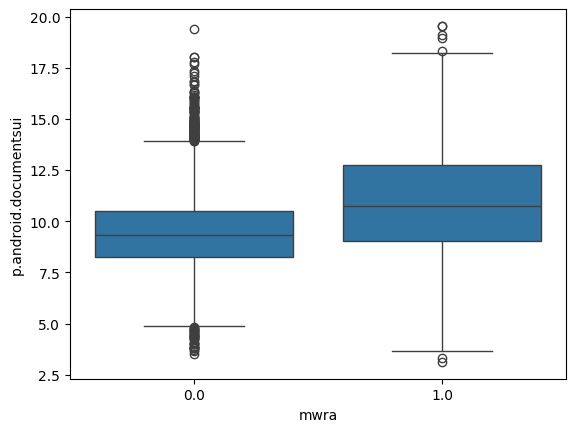

In [41]:
sns.boxplot(x='mwra', y='p.android.documentsui', data=processes)

<Axes: xlabel='mwra', ylabel='p.android.chrome'>

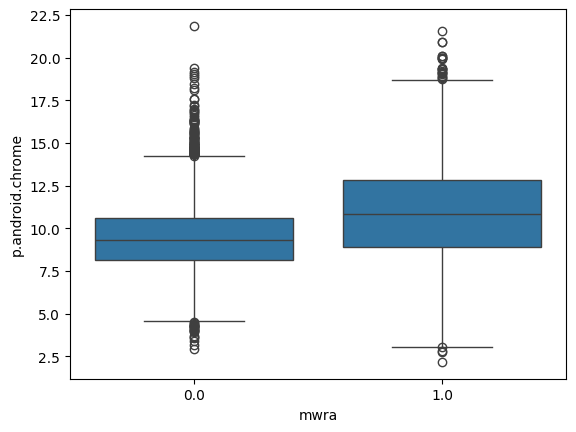

In [42]:
sns.boxplot(x='mwra', y='p.android.chrome', data=processes)